## Exploratory Data Analysis(EDA)

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Даны два датасета: train, test (скачать по ссылке).

Поля датасета:
- search_id - айди поиска (айди группы, которая связана с набором объектов),
- feature_0-78 - признаки этих объектов,
- target - целевая переменная (допустим клик по этому объекту).

Задача:
- обучить модель для релевантной выдачи (можно выбрать любой алгоритм, библиотеку или фреймворк),
- посчитать метрику NDCG (для всех документов, не конкретного топа) на тестовом датасете,
- выложить код на https://github.com отдельным проектом и поделиться ссылкой в поле для ответа.
Будет плюсом, если решение завернуть в docker.


In [26]:
train = pd.read_csv('../data/raw/train_df.csv', )
test = pd.read_csv('../data/raw/test_df.csv', )

In [27]:
print(test.shape)
print(train.shape)

(1529, 81)
(15081, 81)


In [28]:
# обучающая выборка
train.head()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0


In [29]:
# тестовая выборка
test.head()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,10655,9,0,0,1,20,4,40,0,0,...,0.148830,0.196644,0.029267,0,0,0,0.03674,0.0,0.0,0
1,10655,9,0,0,1,20,4,40,0,0,...,0.119724,0.174199,0.020856,0,0,0,0.00000,0.0,0.0,0
2,10655,9,0,0,1,20,4,40,0,0,...,0.160606,0.198780,0.031925,0,0,0,0.00000,0.0,0.0,0
3,10655,9,0,0,1,20,4,40,0,0,...,0.180191,0.187882,0.033855,0,0,0,0.00000,0.0,0.0,0
4,10655,9,0,0,1,20,4,40,0,0,...,0.117308,0.153586,0.018017,0,0,0,0.00000,0.0,0.0,0


In [30]:
print(f'Количество пропущенных значений в обучающем датасете{train.isnull().sum().sum()}')
print(train.isnull().sum())

Количество пропущенных значений в обучающем датасете0
search_id     0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
             ..
feature_75    0
feature_76    0
feature_77    0
feature_78    0
target        0
Length: 81, dtype: int64


In [31]:
print(f'Количество пропущенных значений в тестовом датасете {test.isnull().sum().sum()}')
print(test.isnull().sum())

Количество пропущенных значений в тестовом датасете 0
search_id     0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
             ..
feature_75    0
feature_76    0
feature_77    0
feature_78    0
target        0
Length: 81, dtype: int64


##### Распредление целевой переменной

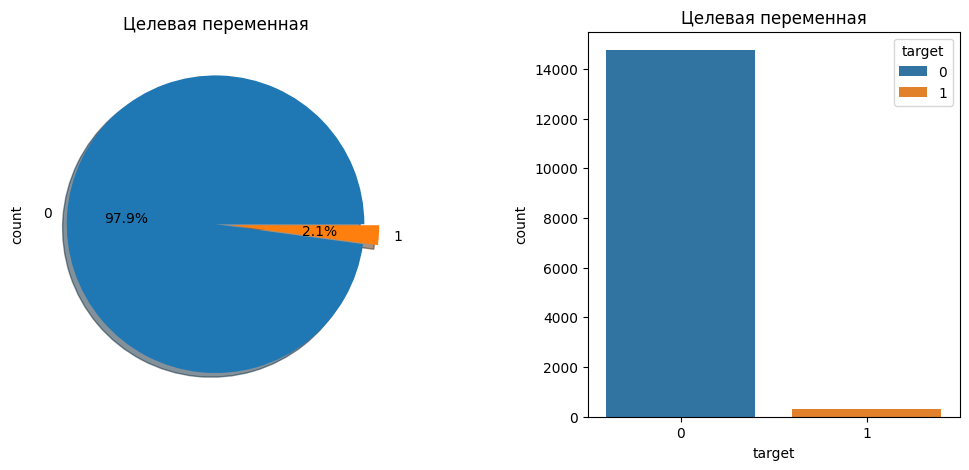

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Первый график - круговая диаграмма
train['target'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=axes[0], shadow=True)
axes[0].set_title('Целевая переменная')
axes[1].set_ylabel('')

# Второй график - гистограмма
sns.countplot(x='target', data=train, ax=axes[1], hue='target')
axes[1].set_title('Целевая переменная')

# Изменение расстояния между графиками
plt.subplots_adjust(wspace=0.5)  # Установка горизонтального пространства между графиками
plt.show()

Виден дисбаланс классов примерно в 45 раз 

### Распределение признаков

Categorical Features:

Есть предположение, что не все признаки являются непрерывными


In [33]:
train.head(20).T.iloc[:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
search_id,758.0,758.0,758.0,758.0,758.0,758.0,758.0,758.0,758.0,758.0,758.0,758.0,758.0,758.0,758.0,758.0,1569.0,1569.0,1569.0,1569.0
feature_0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
feature_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
feature_4,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,9.0,9.0,9.0,9.0
feature_5,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0
feature_6,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,34.0,34.0,34.0,34.0
feature_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_8,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0


#### Распределение категориальных переменных

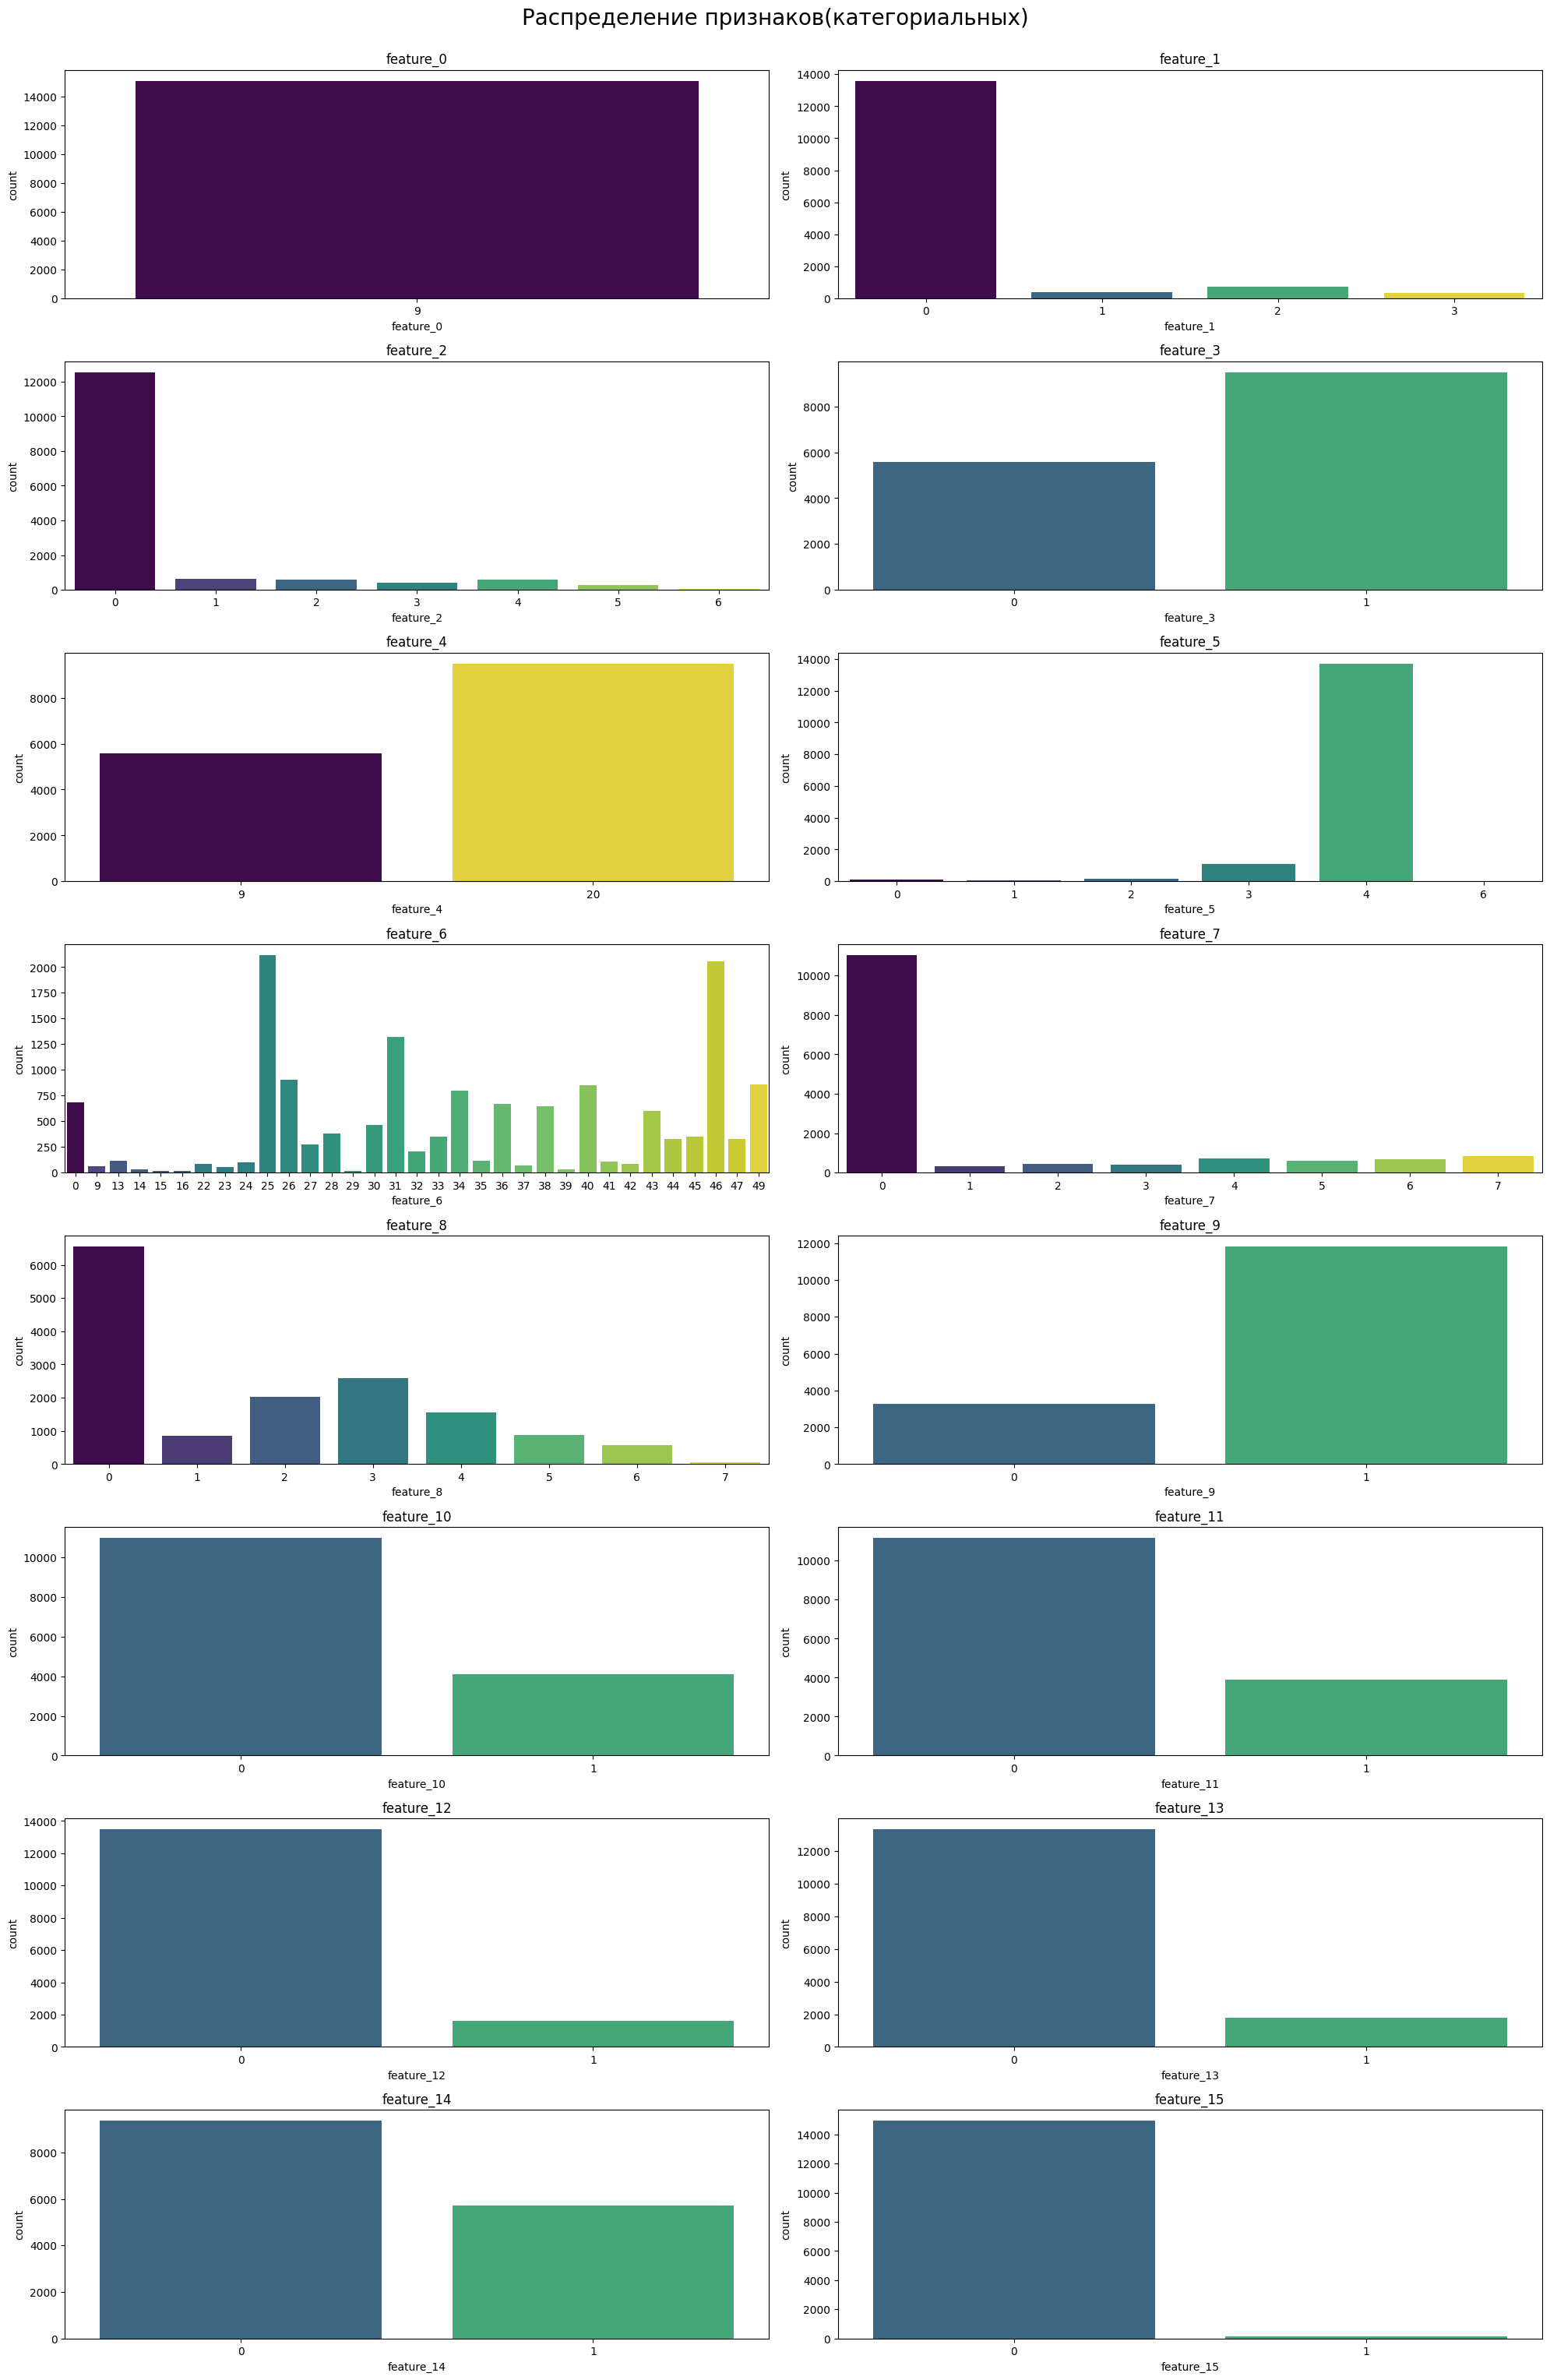

In [34]:
# список категориальных переменных
catcol = train.columns[1:17]

# распределение категориальных переменных
plt.figure(figsize=(20,60))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Распределение признаков(категориальных)", fontsize=20, x=0.5, y=1)

    # Устанавливаем 'hue' равным текущему столбцу и отключаем легенду
    sns.countplot(data=train, x=column, hue=column, palette="viridis", legend=False)
    plt.title(f"{column}")
    plt.tight_layout()


#### Распределение непрерывных величин

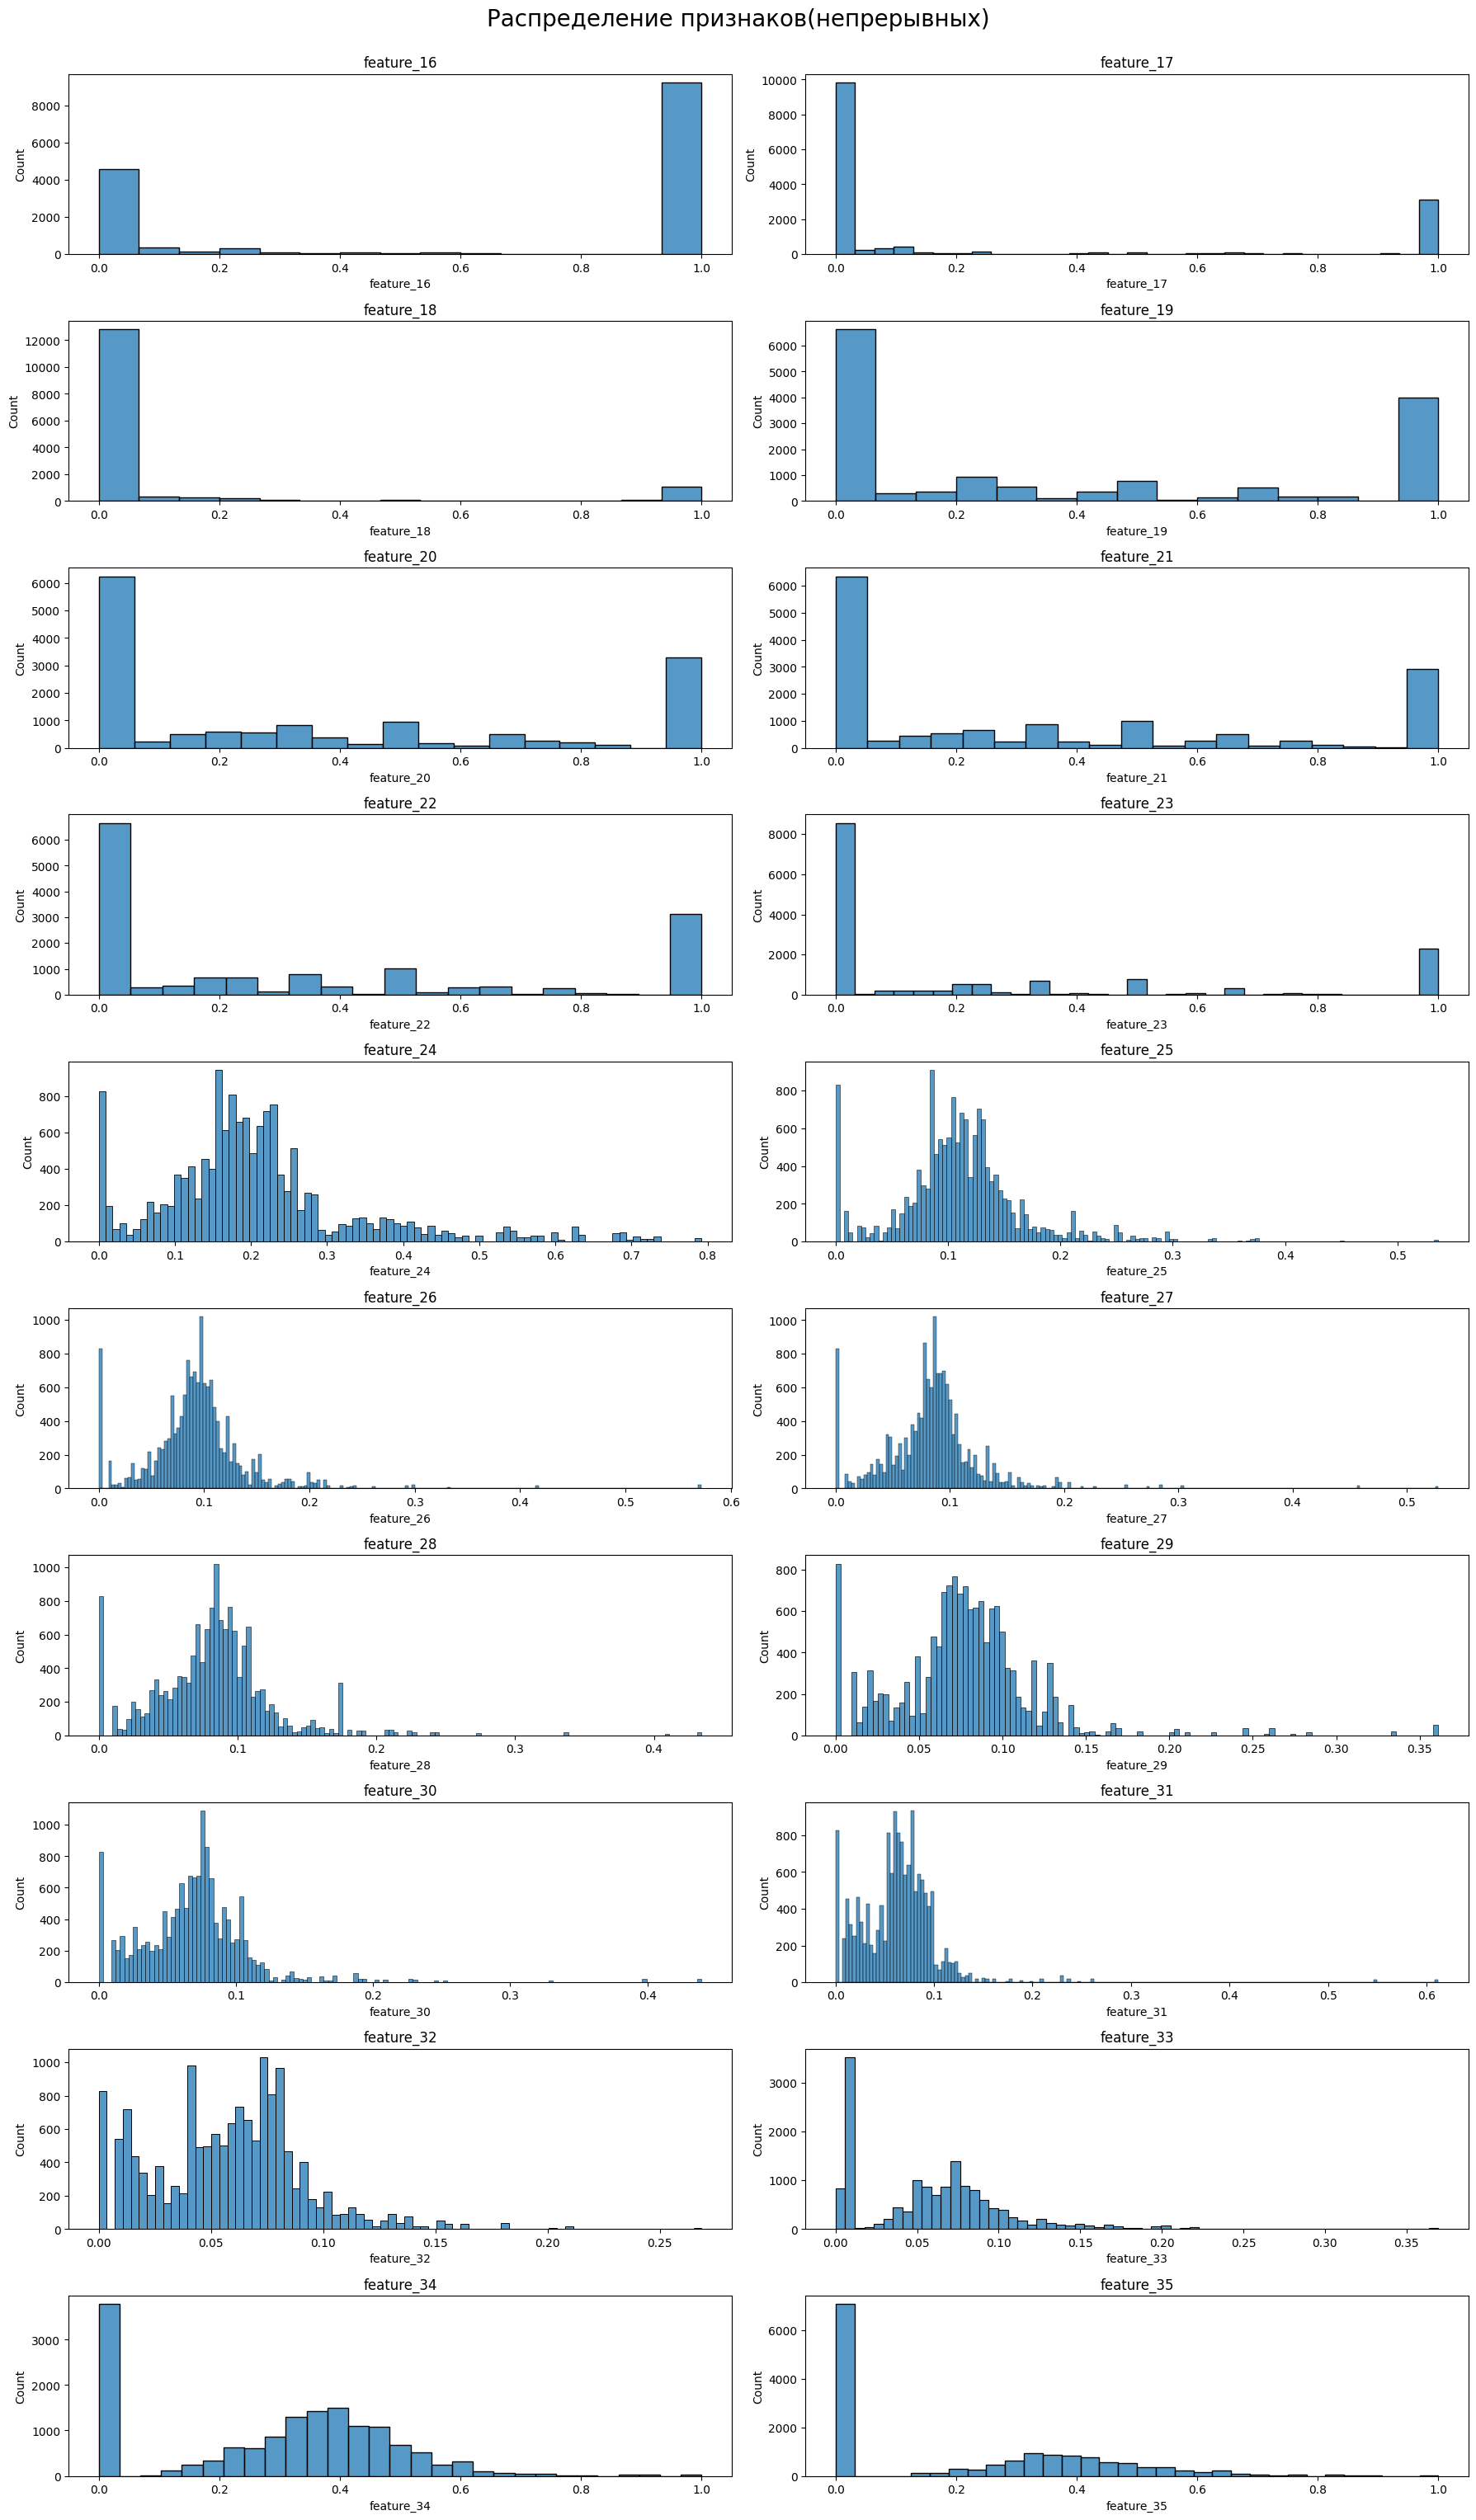

In [35]:
# распределение непрерывных величин
distcol = train.columns[17:37]

plt.figure(figsize=(18, 60))
plt.suptitle('Распределение признаков(непрерывных)', fontsize=20, x=0.5, y=1)
for i, column in enumerate(distcol):
    plt.subplot(len(distcol), 2, i+1)
    
    sns.histplot(data=train, x=column,  kde=False,)
    plt.title(f'{column}')
    plt.tight_layout()

KeyboardInterrupt: 

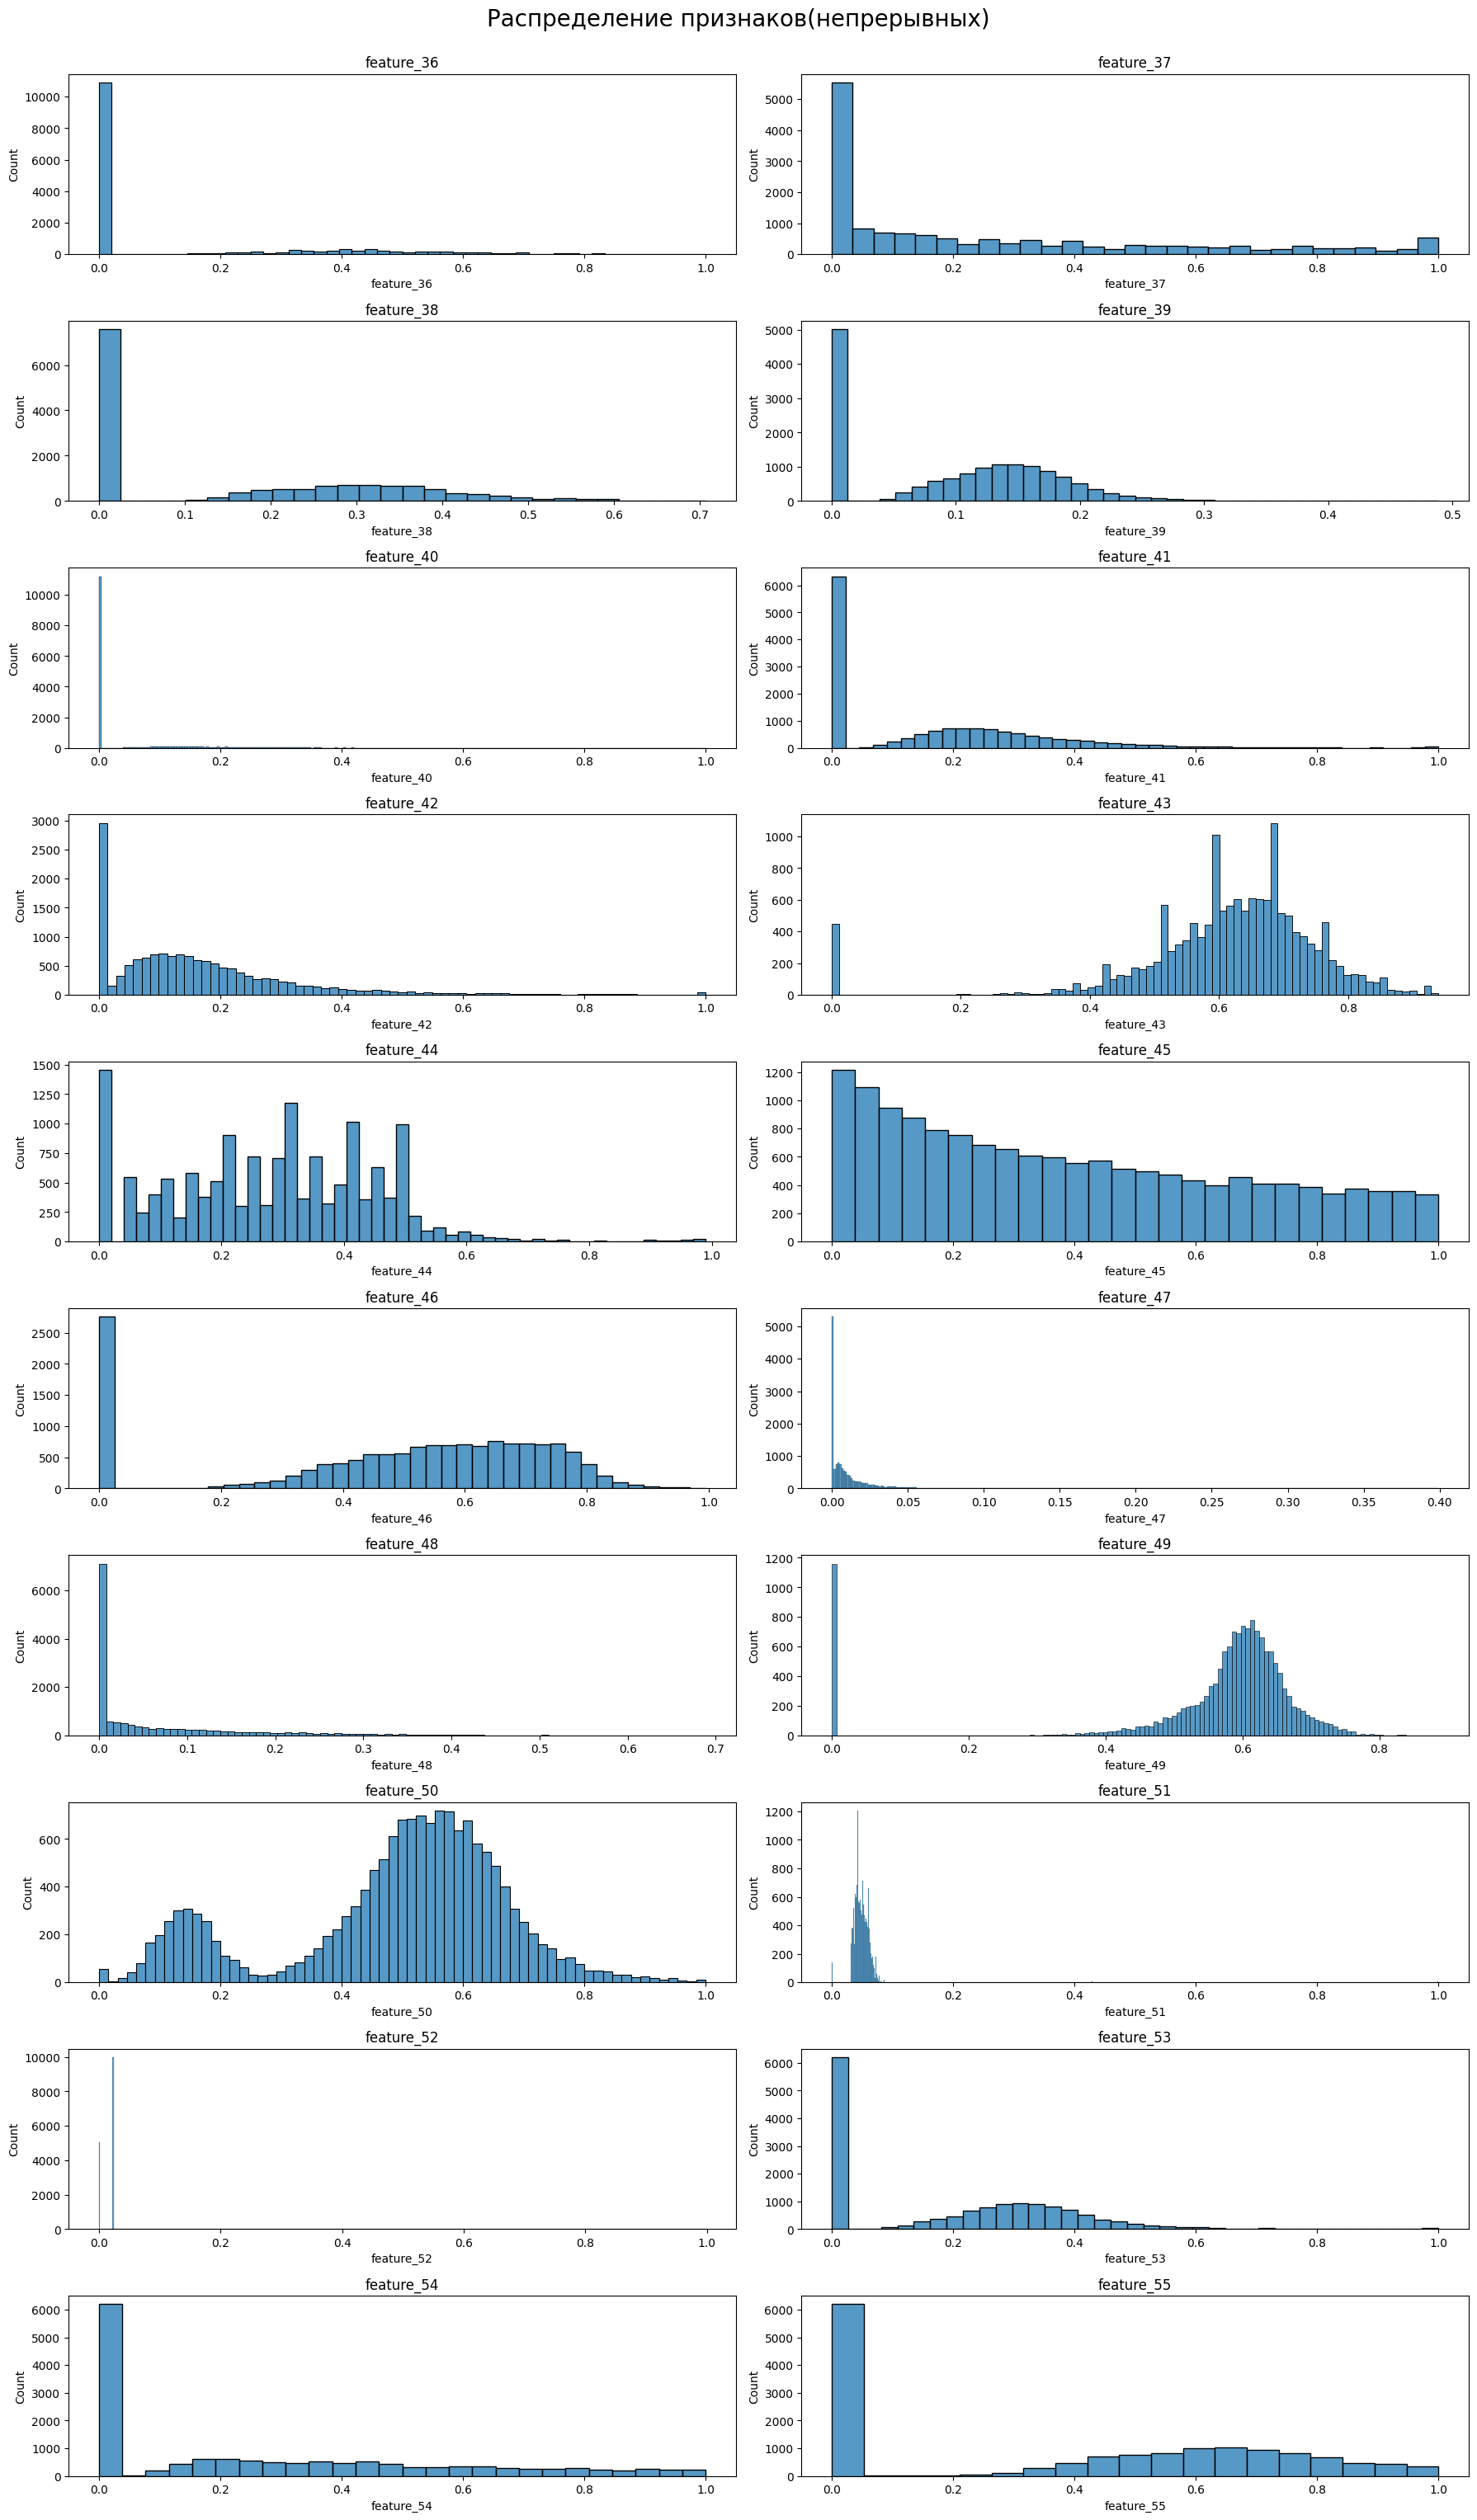

In [36]:
# распределение непрерывных величин
distcol = train.columns[37:57]

plt.figure(figsize=(18, 60))
plt.suptitle('Распределение признаков(непрерывных)', fontsize=20, x=0.5, y=1)
for i, column in enumerate(distcol):
    plt.subplot(len(distcol), 2, i+1)
    
    sns.histplot(data=train, x=column,  kde=False,)
    plt.title(f'{column}')
    plt.tight_layout()


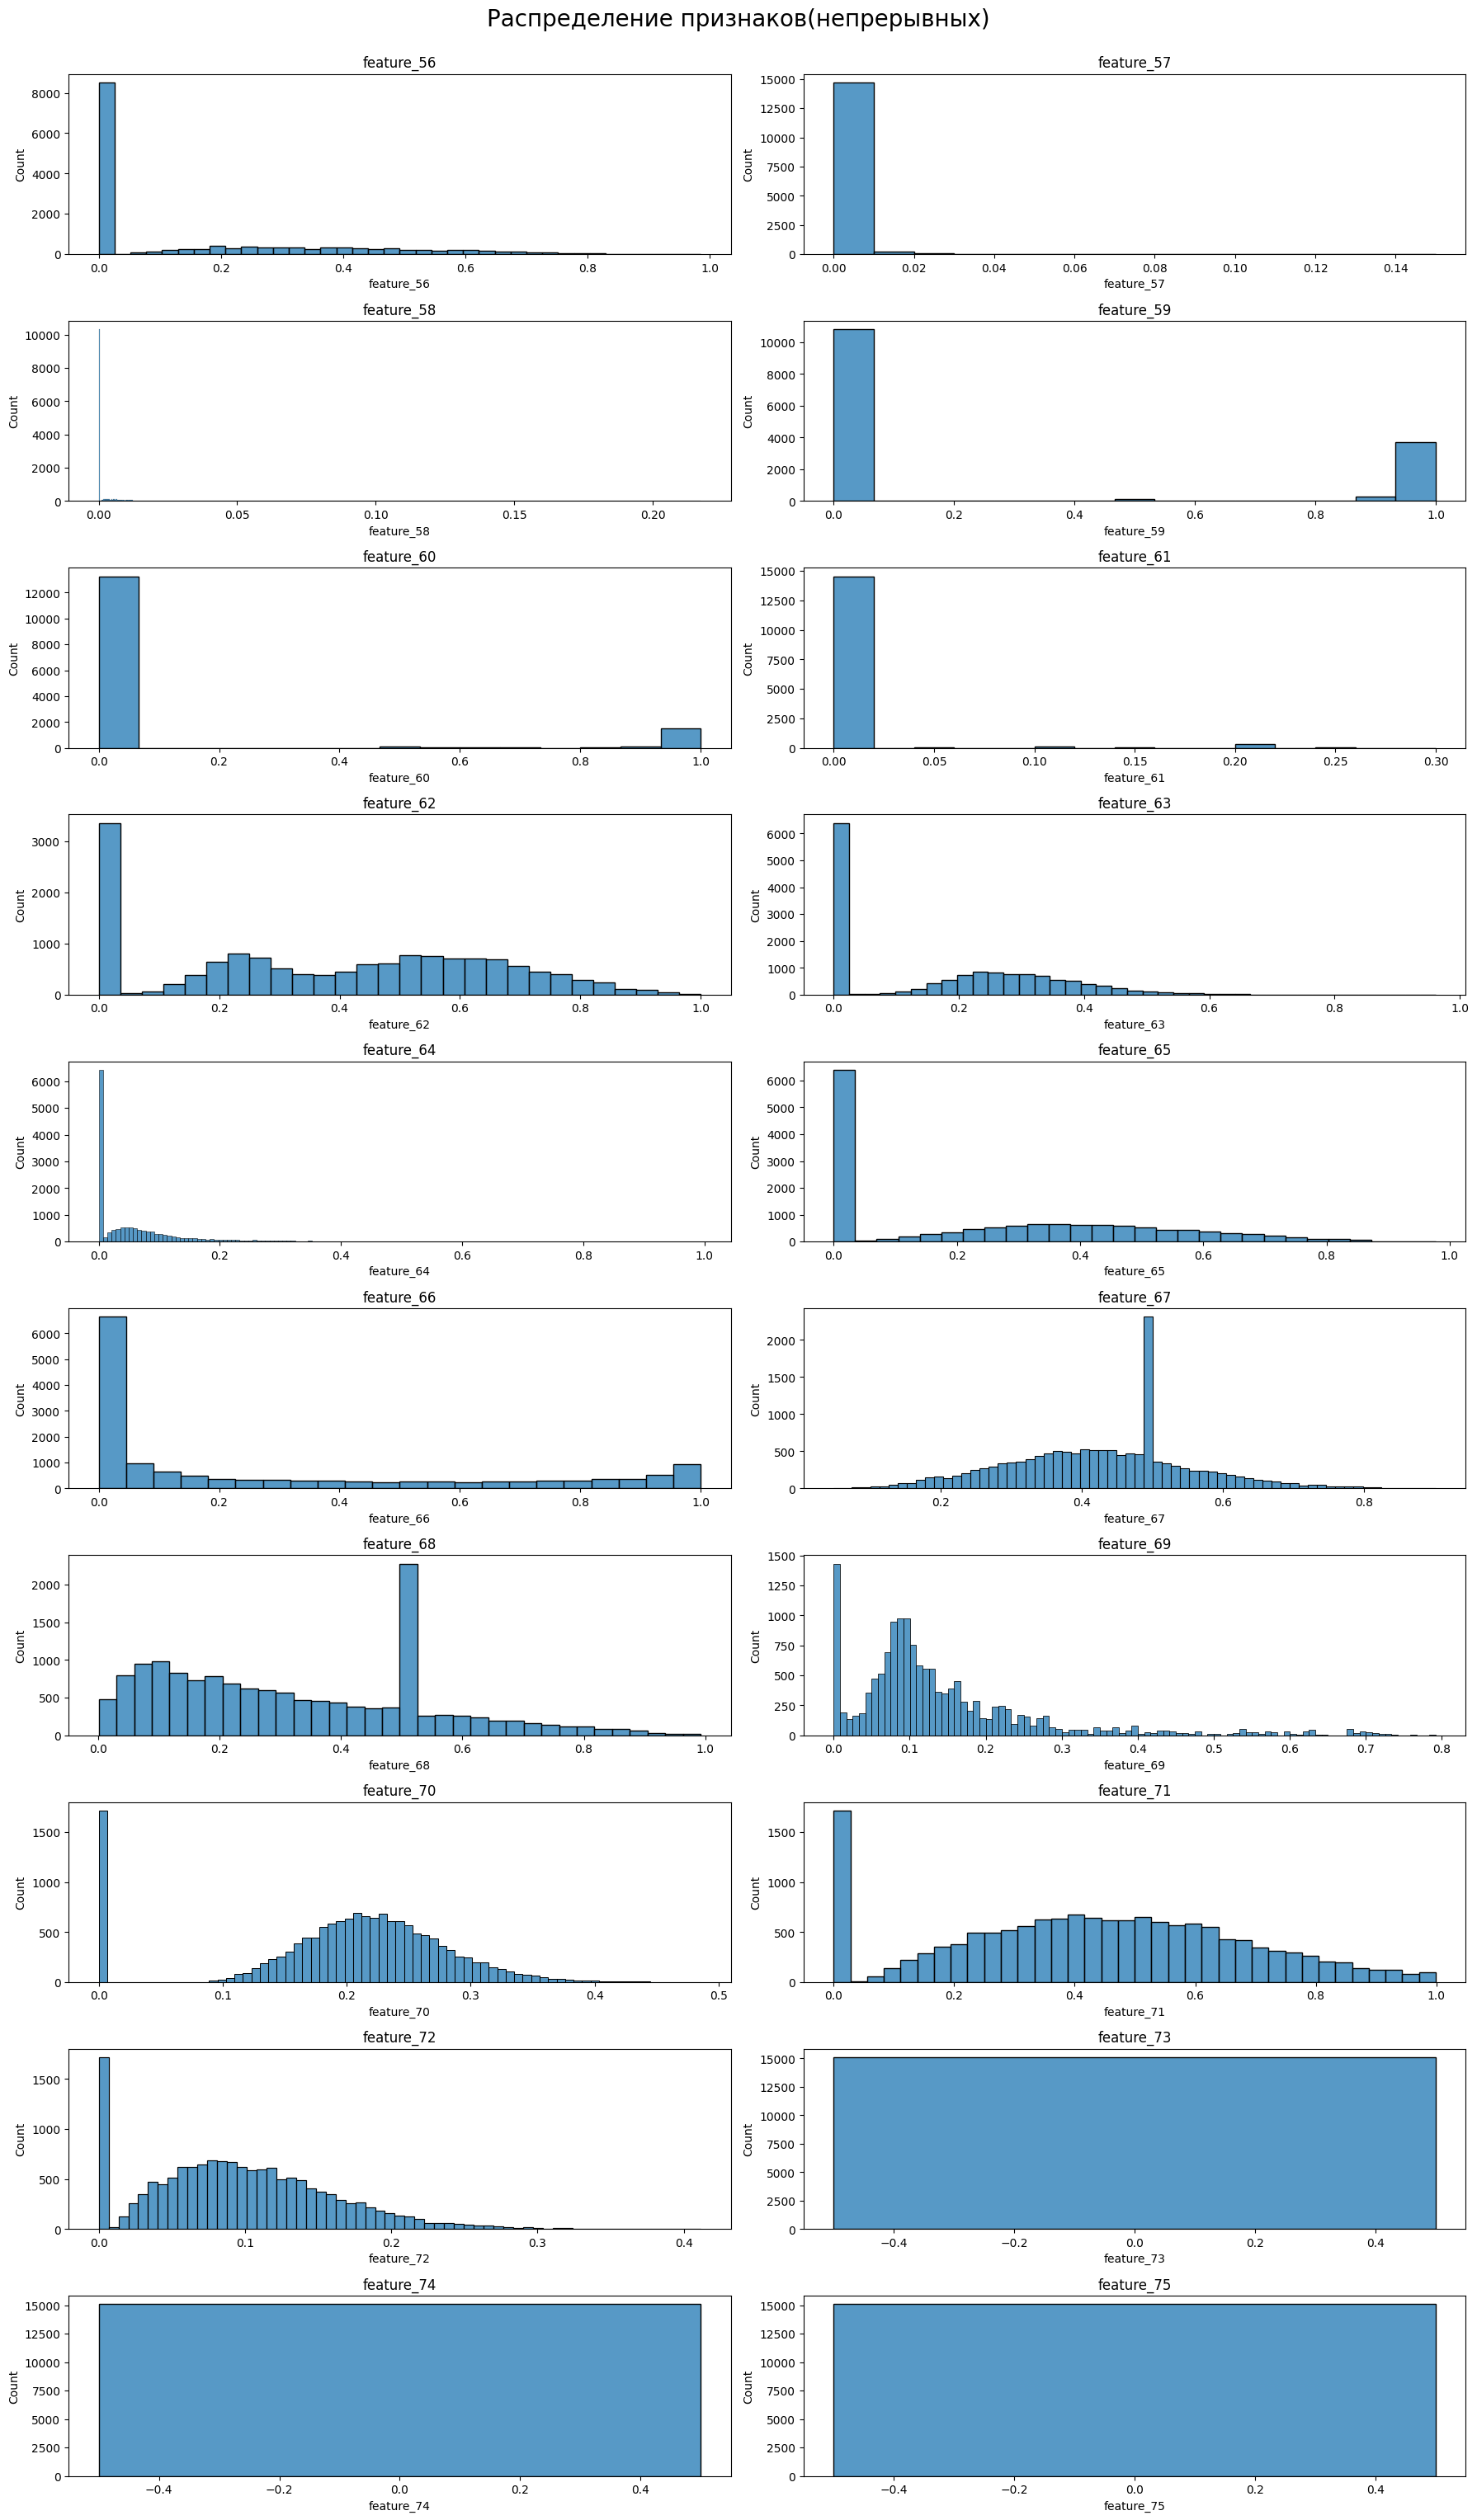

In [ ]:
# распределение непрерывных величин
distcol = train.columns[57:77]

plt.figure(figsize=(18, 60))
plt.suptitle('Распределение признаков(непрерывных)', fontsize=20, x=0.5, y=1)
for i, column in enumerate(distcol):
    plt.subplot(len(distcol), 2, i+1)
    
    sns.histplot(data=train, x=column,  kde=False,)
    plt.title(f'{column}')
    plt.tight_layout()


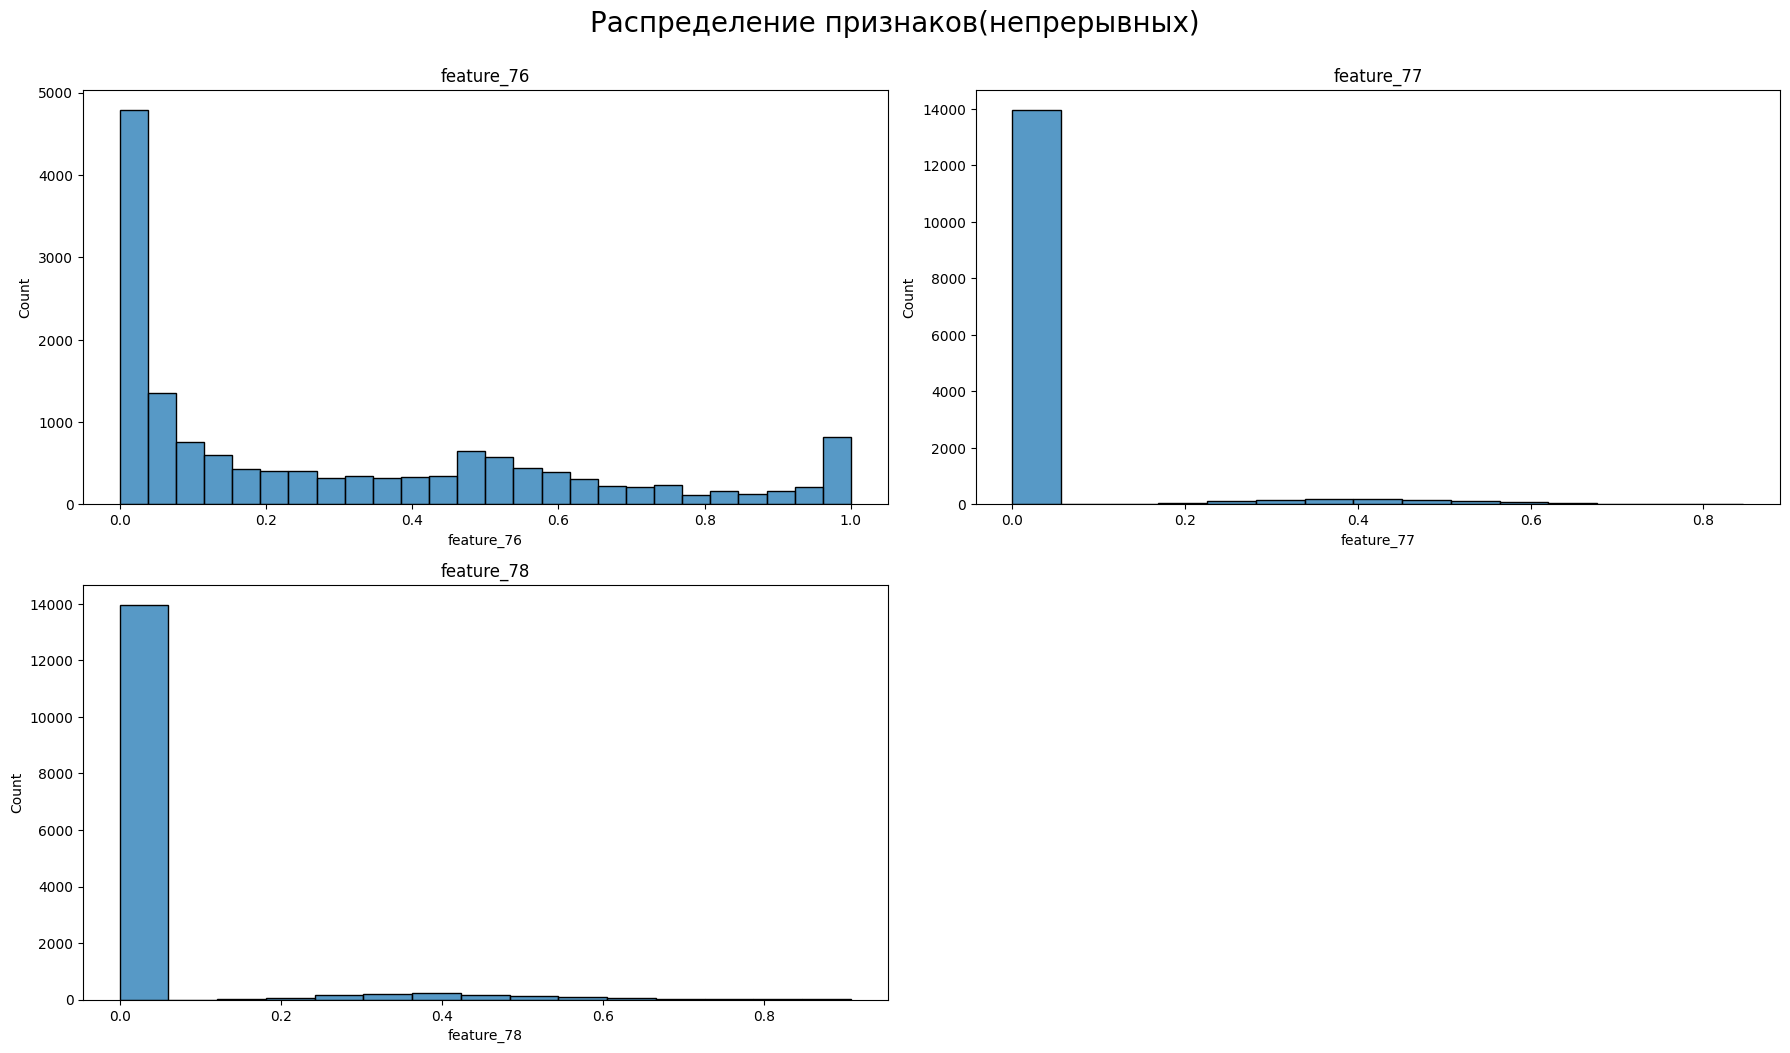

In [ ]:
# распределение непрерывных величин
distcol = train.columns[77:80]

plt.figure(figsize=(18, 15))
plt.suptitle('Распределение признаков(непрерывных)', fontsize=20, x=0.5, y=1)
for i, column in enumerate(distcol):
    plt.subplot(len(distcol), 2, i+1)
    
    sns.histplot(data=train, x=column,  kde=False,)
    plt.title(f'{column}')
    plt.tight_layout()

#### Выводы по анализу распределения непрерывных величин:

1) Не все признаки имеют соответствующий тип данных. Возможно, некоторые признаки были неправильно интерпретированы как непрерывные, хотя они должны быть категориальными.

2) Анализ графиков распределения признаков позволил сделать следующие выводы:
   - Среди категориальных признаков [feature_0.... feature_15], за исключением feature_6, обнаружены определенные характеристики.
   - Признаки [feature_0, feature_73, feature_74, feature_75] обнаружены с константными значениями, что может быть признаком проблемы с данными.
   - Многие признаки имеют аномальные значения и характеризуются тяжелыми хвостами в распределениях, что может указывать на наличие выбросов или необычных особенностей в данных.


### Таблицы перекрестных частот признаков

In [ ]:
# Создаем таблицу перекрестных частот для анализа взаимосвязи между feature_1 и target
pd.crosstab(train['feature_1'], train['target'] ,margins=True).style.background_gradient()

target,0,1,All
feature_1,,,
0,13302,290,13592
1,393,13,406
2,725,8,733
3,339,11,350
All,14759,322,15081


In [ ]:
# Создаем таблицу перекрестных частот для анализа взаимосвязи между [feature_3, feature_5] и target
pd.crosstab([train['feature_3'], train['feature_5']], train['target'] ,margins=True).style.background_gradient()

In [ ]:
pd.crosstab([train['feature_15'], train['feature_12']], train['target'], margins=True).style.background_gradient()

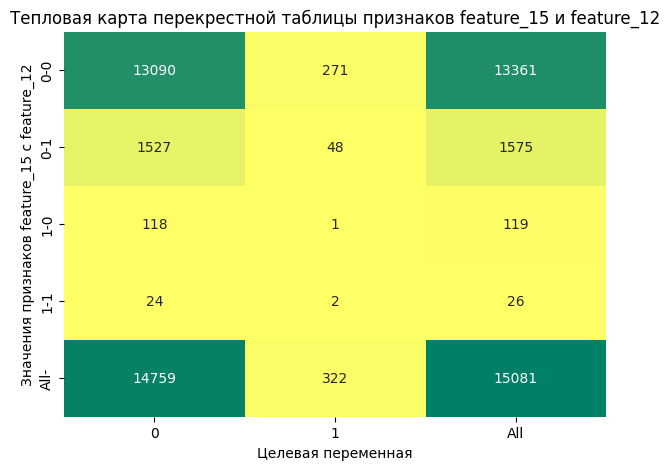

In [ ]:
# Создание перекрестной таблицы
cross_tab = pd.crosstab([train['feature_15'], train['feature_12']], train['target'], margins=True)

# Построение тепловой карты
plt.figure(figsize=(7, 5))
sns.heatmap(cross_tab, annot=True, cmap='summer_r', fmt='d', cbar=False)
plt.title('Тепловая карта перекрестной таблицы признаков feature_15 и feature_12')
plt.xlabel('Целевая переменная')
plt.ylabel('Значения признаков feature_15 с feature_12')
plt.show()

##### Распределение категориальных переменных(значений) относительно target

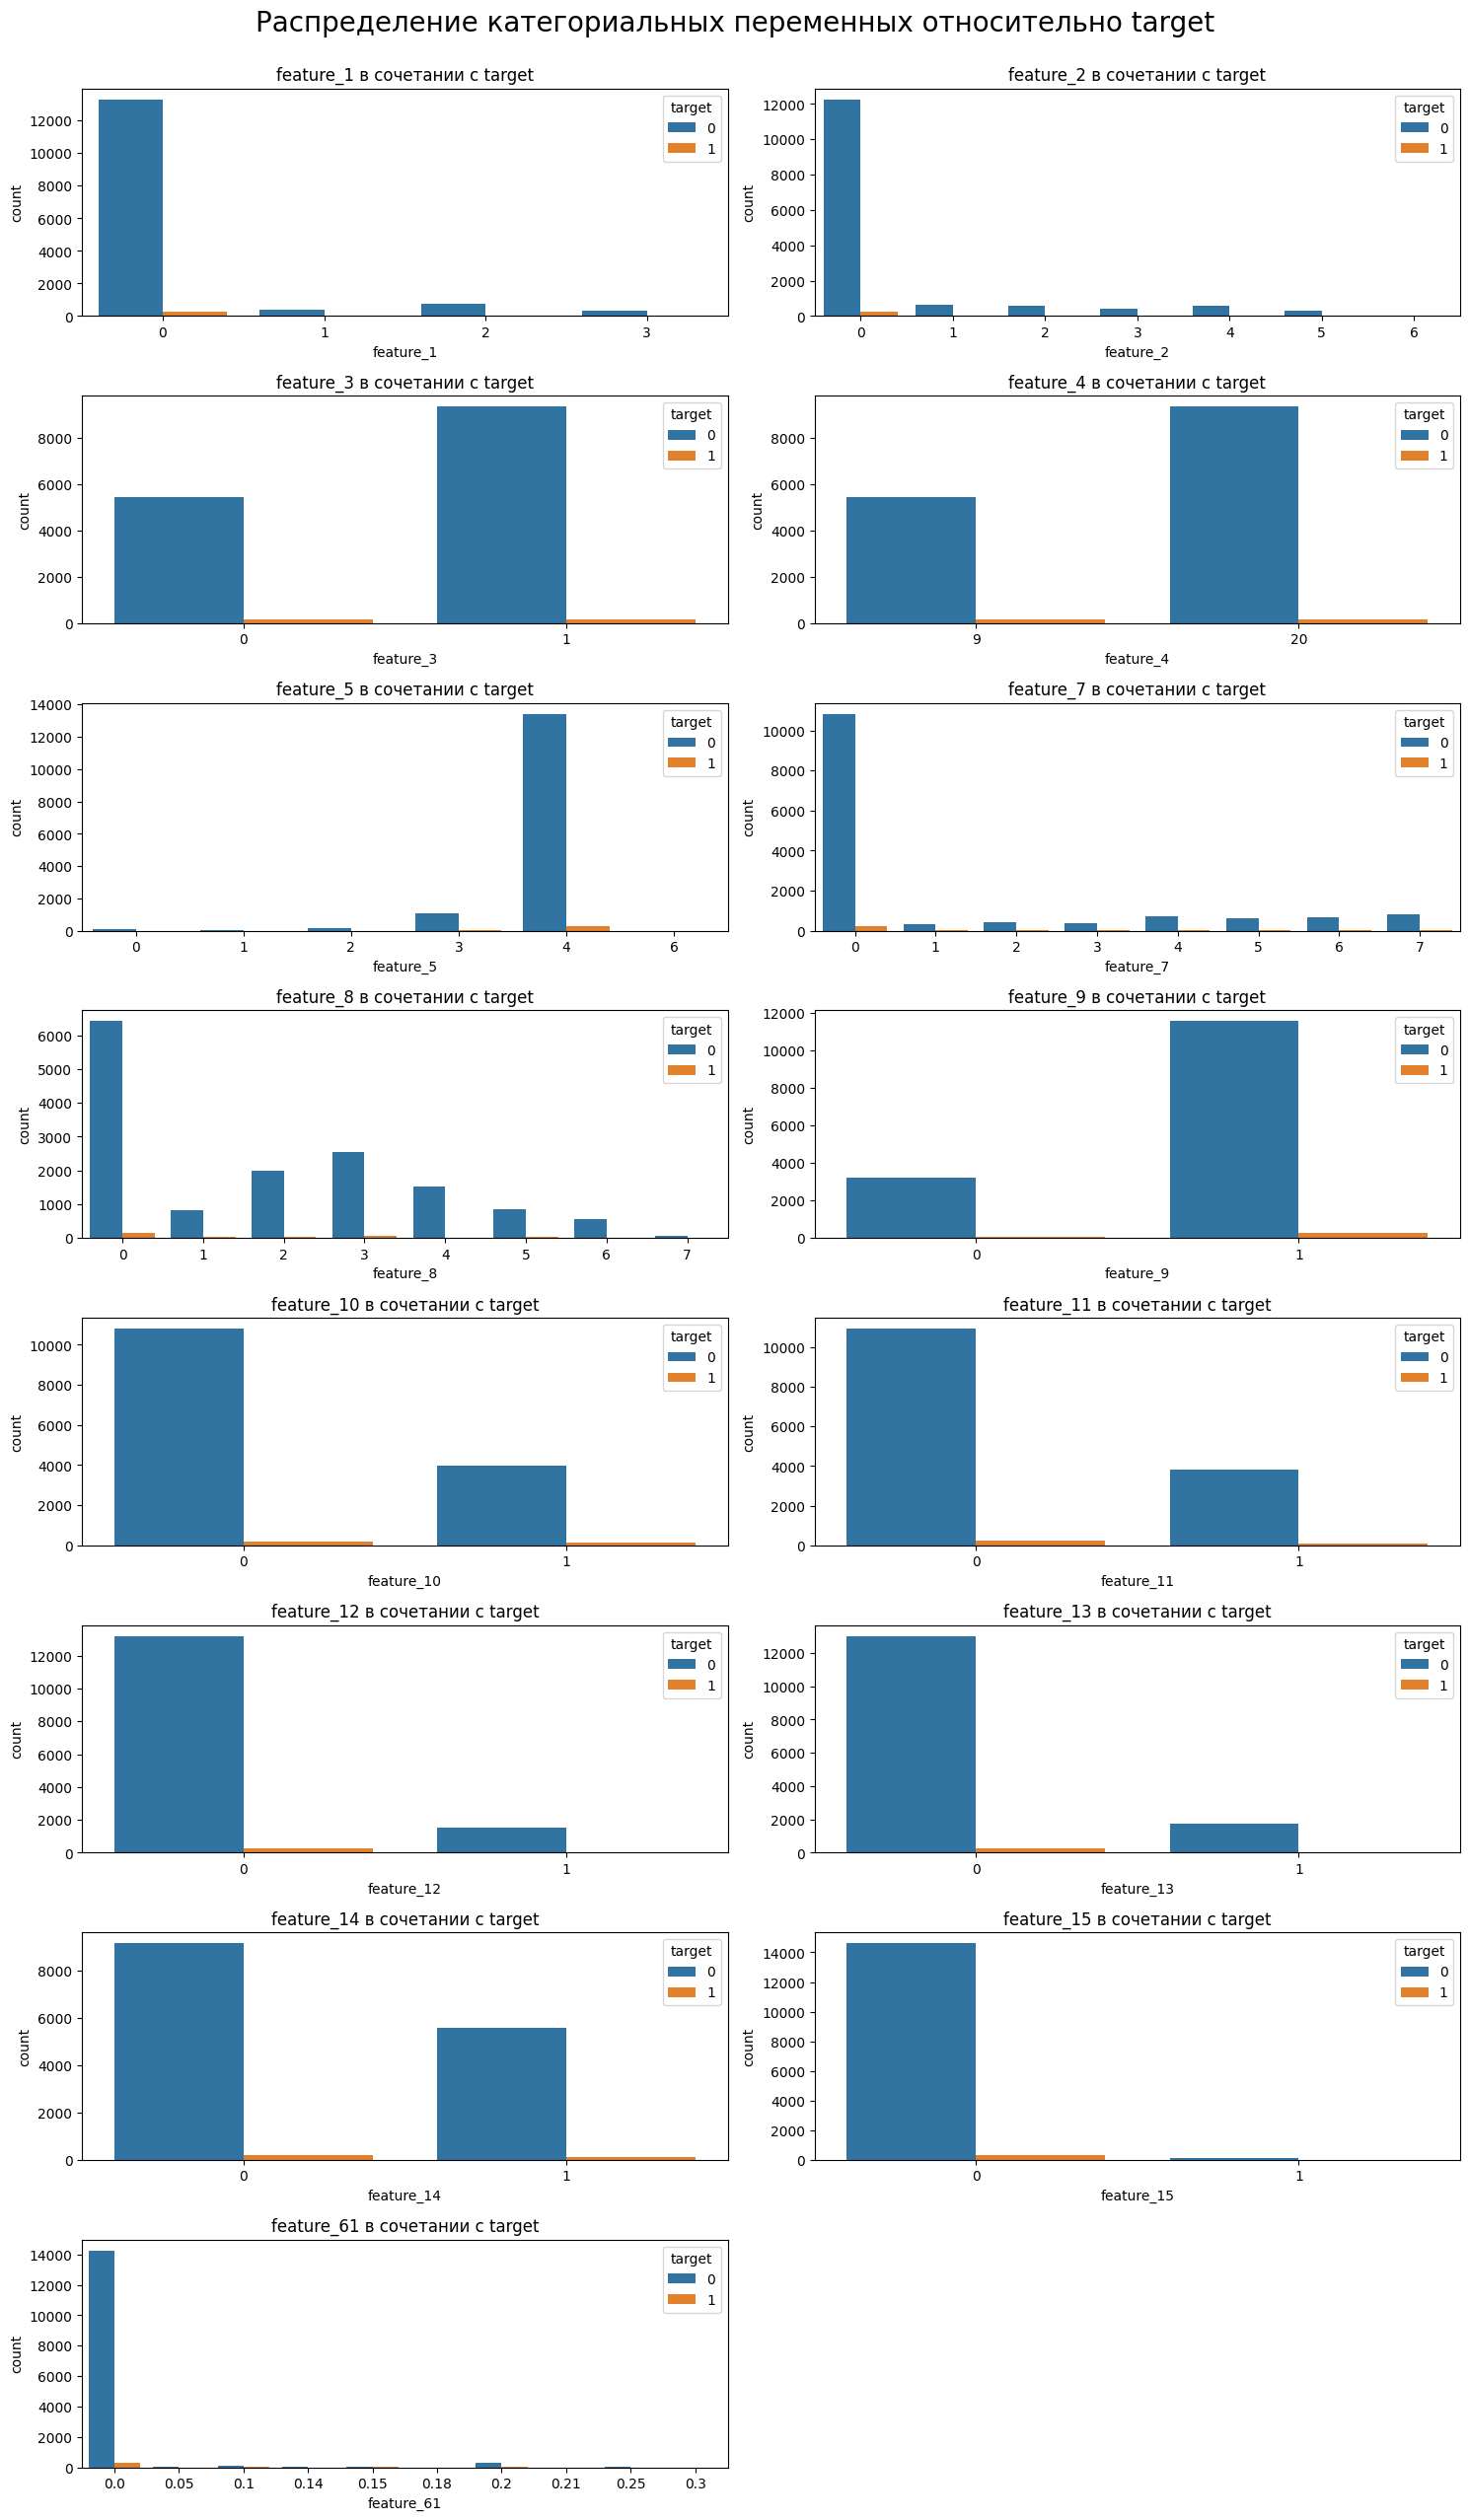

In [ ]:
# Распределение категориальных переменных(значений) относительно target

cat_columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_7', 
               'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_61']


plt.figure(figsize=(15,50))
for i,column in enumerate(cat_columns):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Распределение категориальных переменных относительно target", fontsize=20, x=0.5, y=1)
    sns.countplot(data=train, x=column, hue='target')
    
    plt.title(f"{column} в сочетании с target")
    plt.tight_layout()

#### Выводы по анализу распределения категориальных переменных относительно целевой переменной:

1) На основе проведенного анализа можно утверждать, что в каждом категориальном признаке преобладает определенная категория, которая может быть существенной или информативной для целевой переменной. Это указывает на потенциальную важность этих категорий для различения или предсказания классов целевой переменной.

#### Графики скрипичных диаграмм

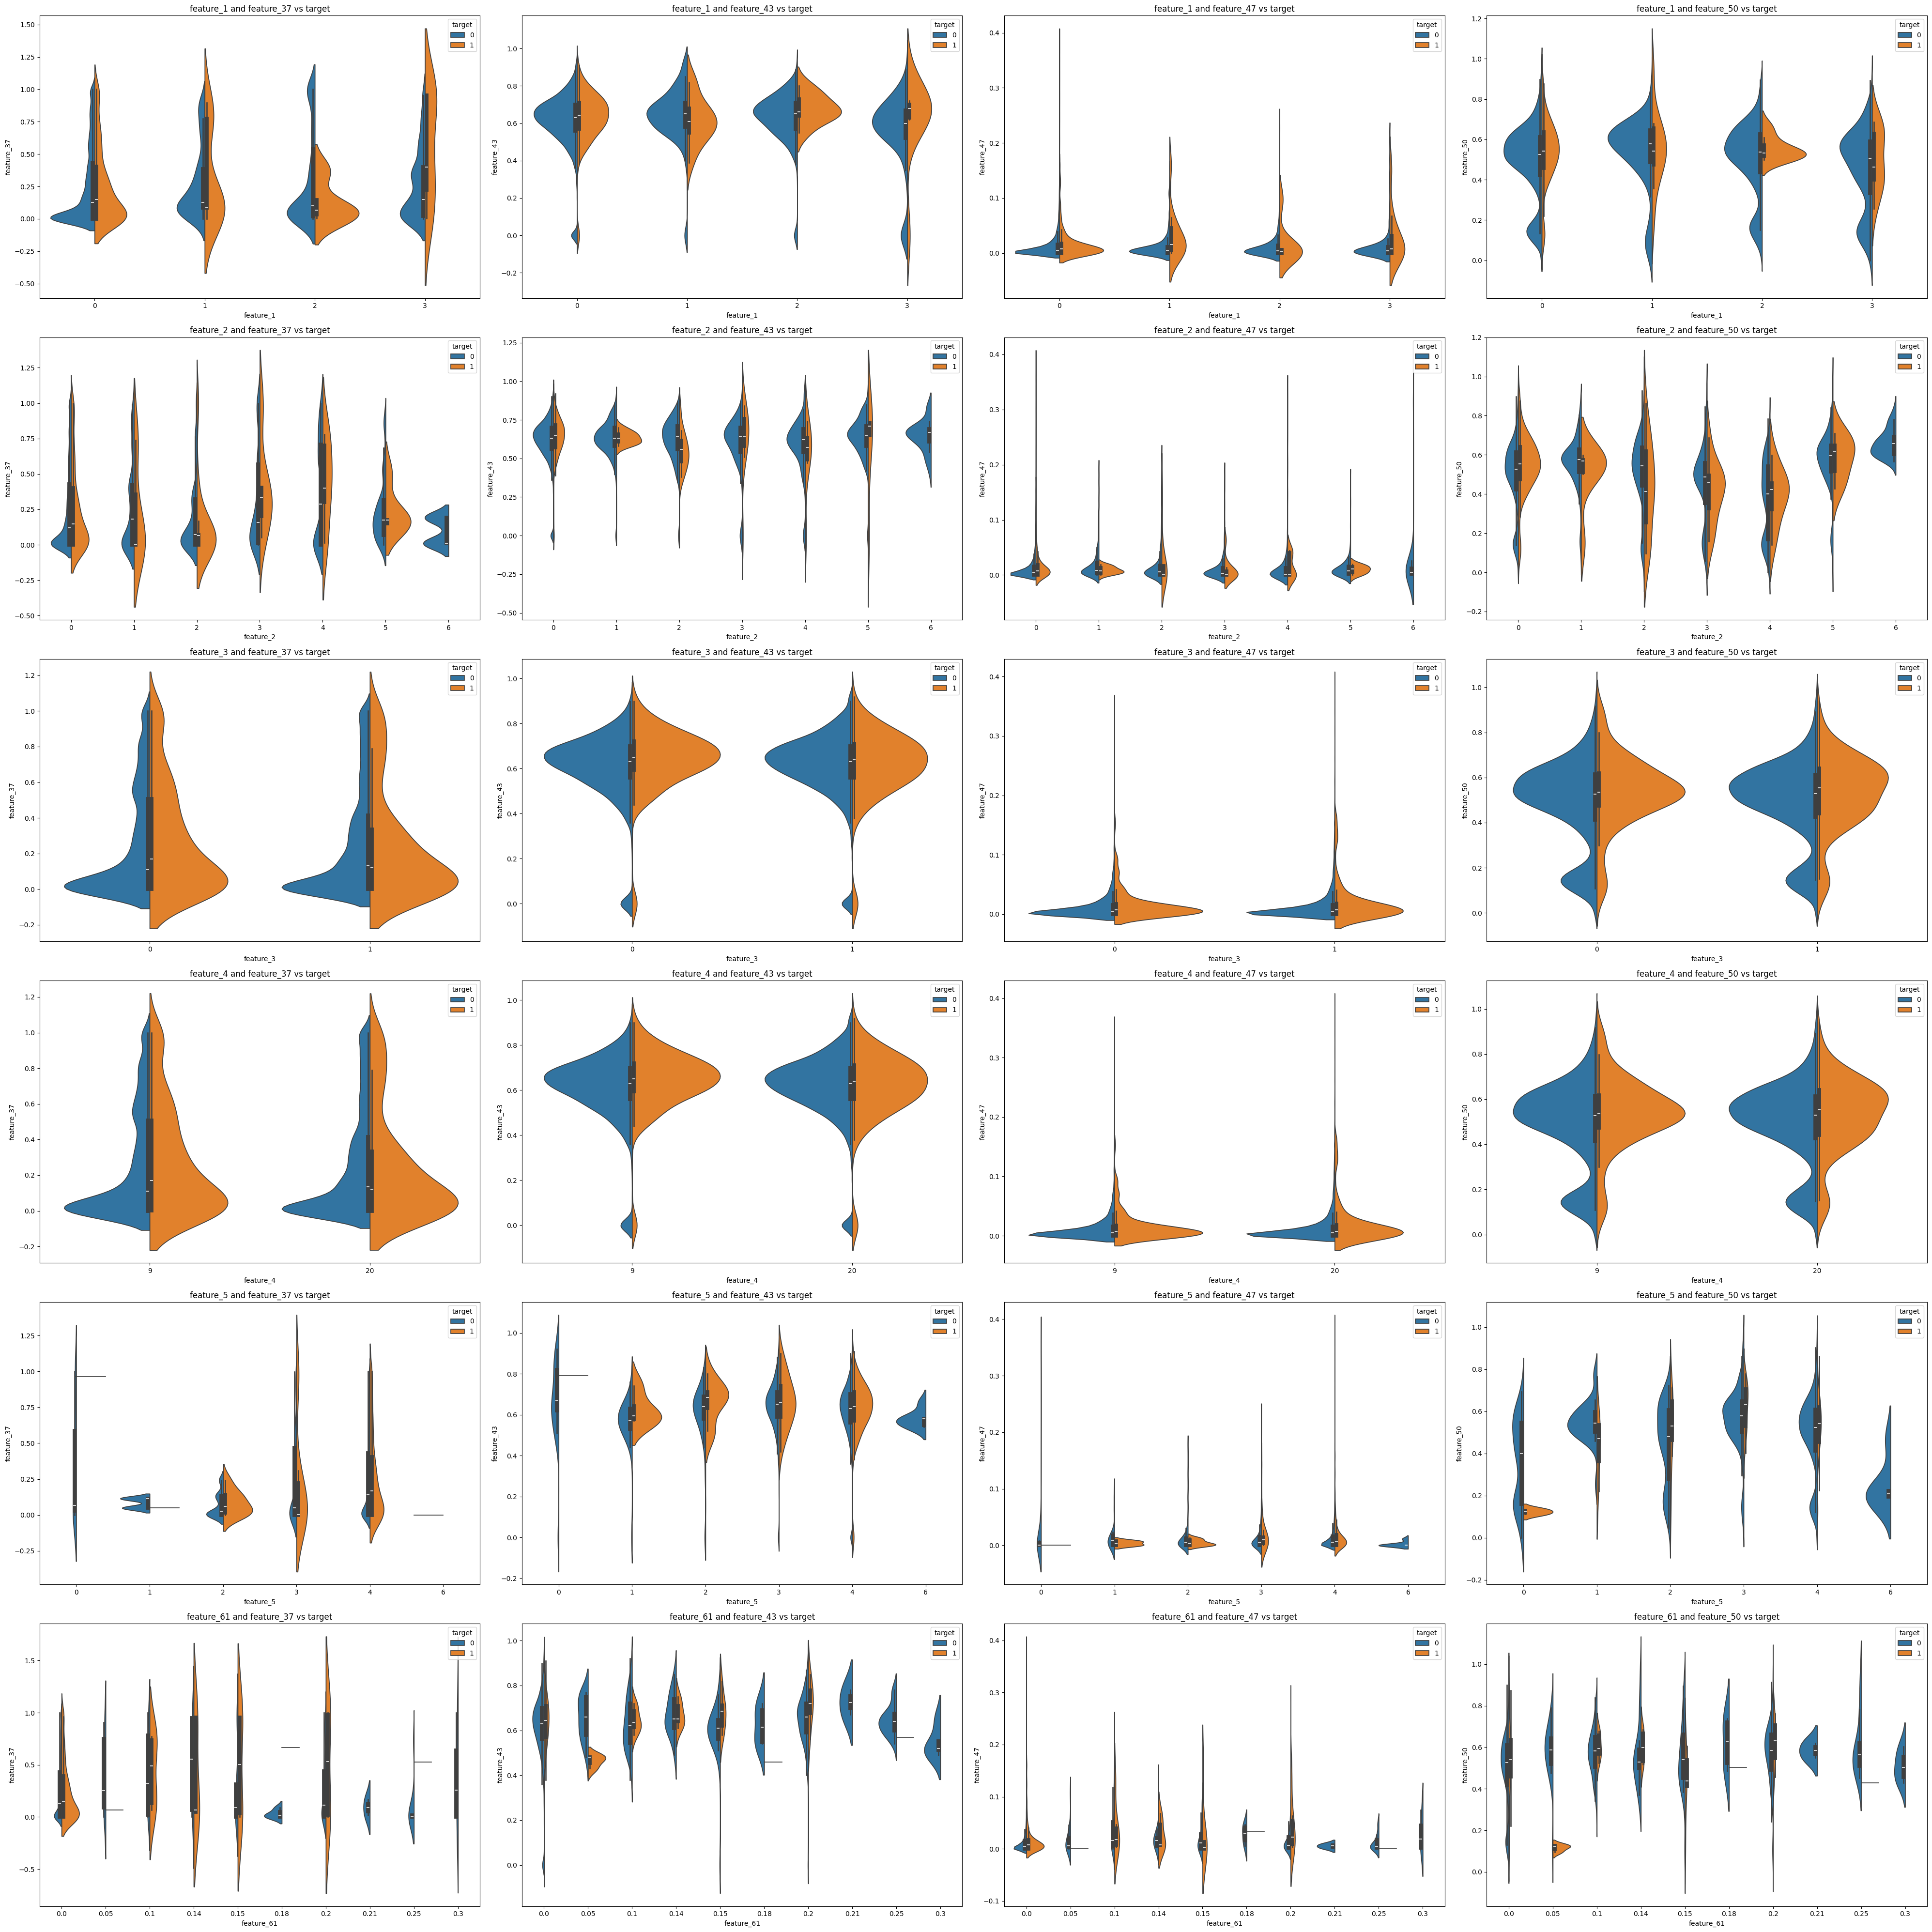

In [ ]:
violin_columns_x = ['feature_1', 'feature_2', 'feature_3', 
                  'feature_4','feature_5', 'feature_61' ]

violin_columns_y = ['feature_37', 'feature_43', 'feature_47', 'feature_50']


# Создание полотна для графиков
fig, axes = plt.subplots(nrows=len(violin_columns_x), ncols=len(violin_columns_y), figsize=(40, 40))


# Итерация по признакам violin_columns_x
for i, feature_x in enumerate(violin_columns_x):
    # Итерация по признакам violin_columns_y
    for j, feature_y in enumerate(violin_columns_y):
        # Построение скрипичной диаграммы
        sns.violinplot(x=feature_x, y=feature_y, hue='target', data=train, ax=axes[i, j], split=True)
        axes[i, j].set_title(f'{feature_x} and {feature_y} vs target')
        axes[i, j].legend(title='target')

plt.tight_layout()
plt.show()

### Выводы по анализу скрипковых графиков:

1) Визуальный анализ скрипковых графиков позволил также обнаружить наличие выбросов или аномальных значений в распределении каждого признака. Это может указывать на потенциальные ошибки в данных или на необычные особенности взаимосвязей между признаками и целевой переменной.

2) Распределение значений каждого признака в зависимости от целевой переменной в большинстве случаев не является нормальным. Это говорит о том, что влияние признаков на целевую переменную может быть нелинейным или иметь другие нестандартные формы.

3) Некоторые значения признаков могут с высокой точностью предсказывать целевую переменную. Это может указывать на сильную взаимосвязь между этими признаками и целевой переменной, что делает их потенциально важными для моделирования или принятия решений.

#### Графики с усами

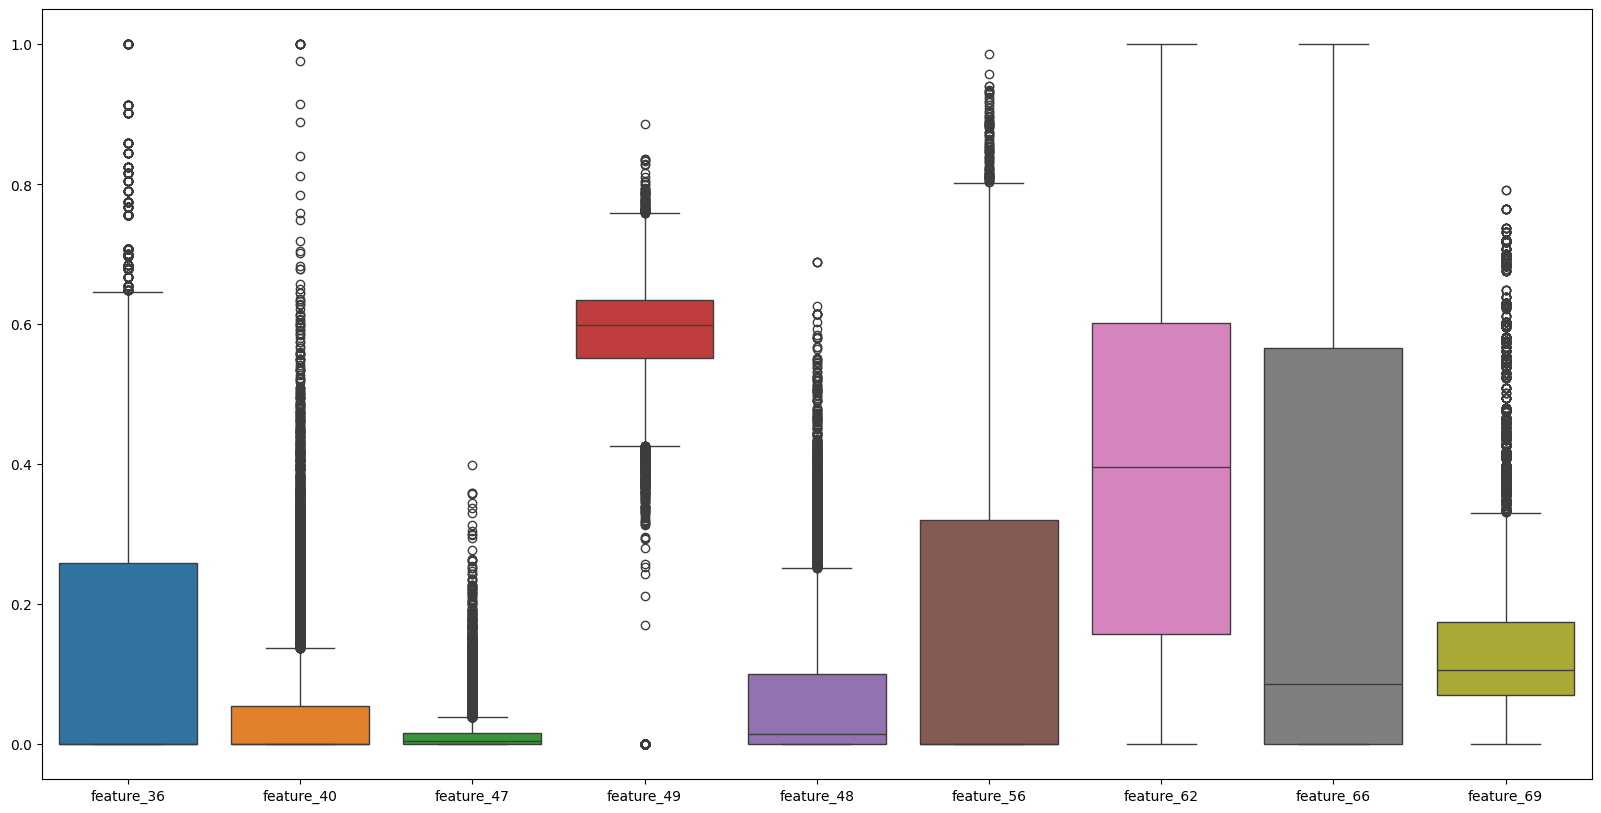

In [52]:
# график с усами
features_list = ['feature_36', 'feature_40','feature_47','feature_49','feature_48','feature_56','feature_62','feature_66','feature_69']

plt.figure(figsize=(20, 10))
sns.boxplot(data=train[features_list], orient='v')
plt.show()


#### Выводы по анализу графиков с усами:

1) Некоторые признаки имеют размытую границу первого квартиля, что указывает на наличие значительного разброса вниз по данным. Это может быть признаком наличия выбросов или аномальных значений в распределении данных.

2) Обнаружены значения признаков, которые превышают среднее значение в несколько раз. Это также указывает на наличие экстремальных значений или выбросов в данных, которые могут оказать существенное влияние на результаты анализа.
